In [1]:
import pandas as pd
data = pd.read_csv('advertising.csv')

In [2]:
data.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [3]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def boxplot(str,column):
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column} {str}')
    plt.show()

Before Outlier Removing:  TV


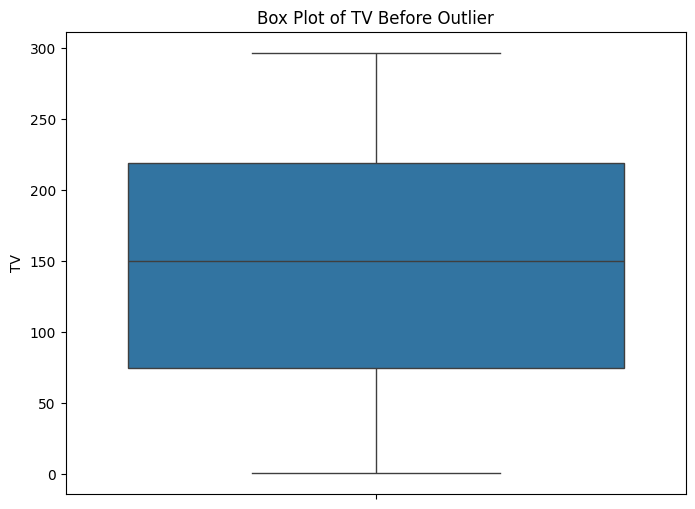

After Outlier Removing:  TV


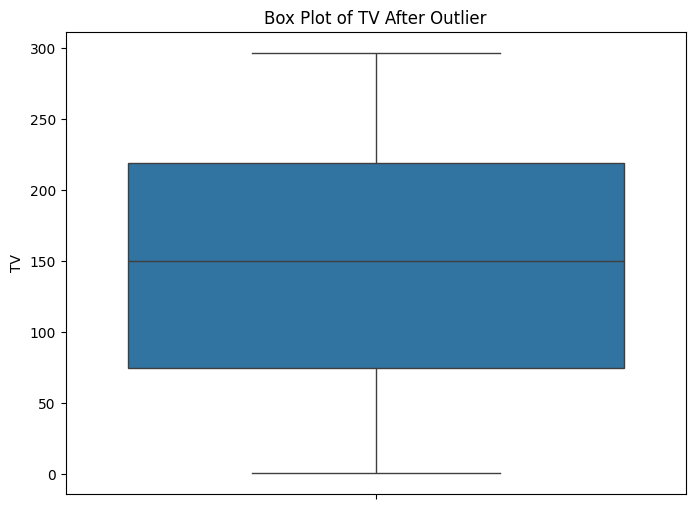

Before Outlier Removing:  Radio


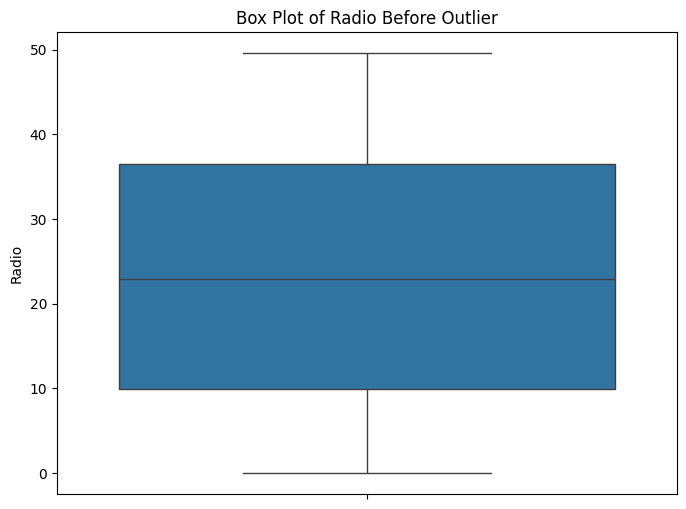

After Outlier Removing:  Radio


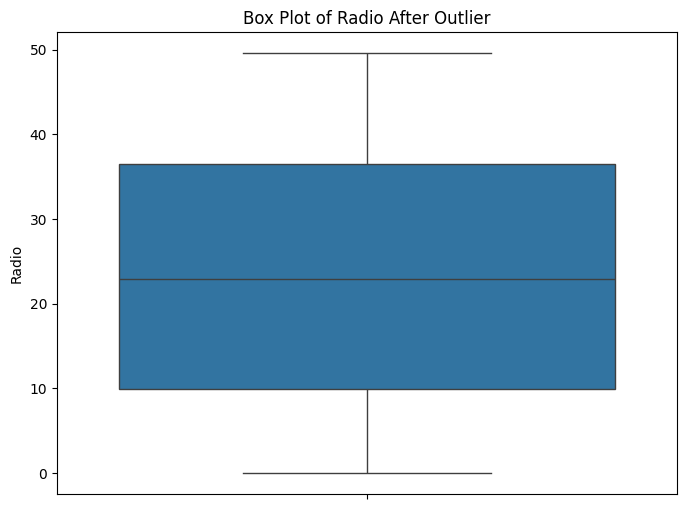

Before Outlier Removing:  Newspaper


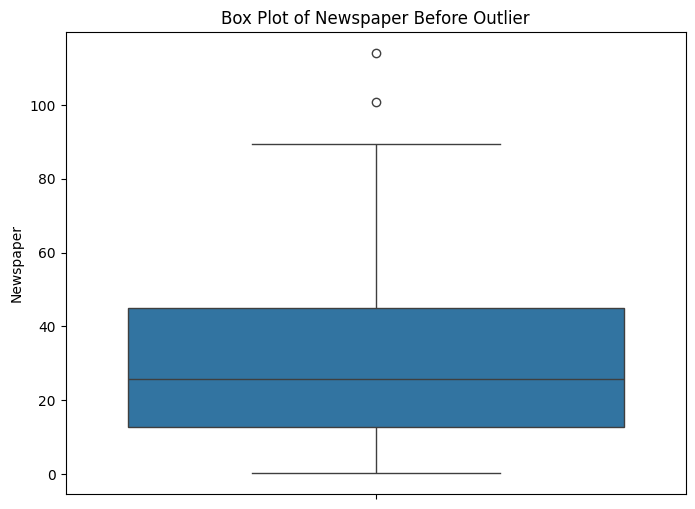

After Outlier Removing:  Newspaper


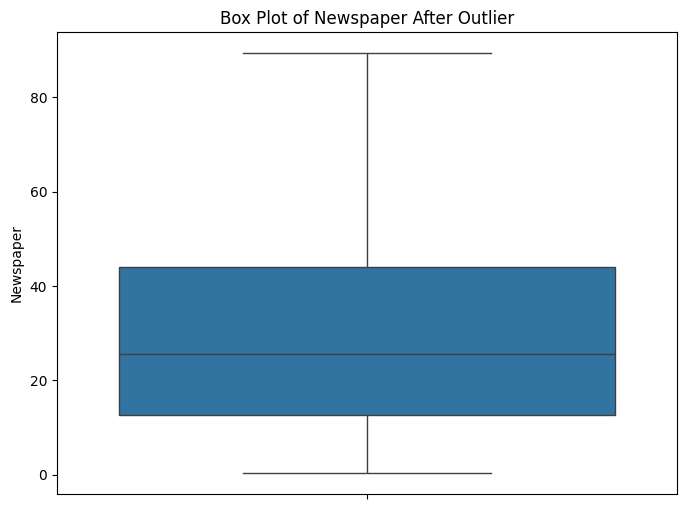

Before Outlier Removing:  Sales


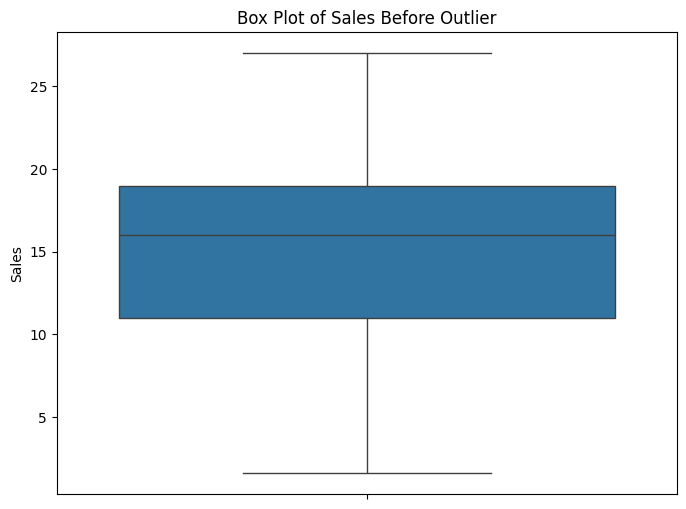

After Outlier Removing:  Sales


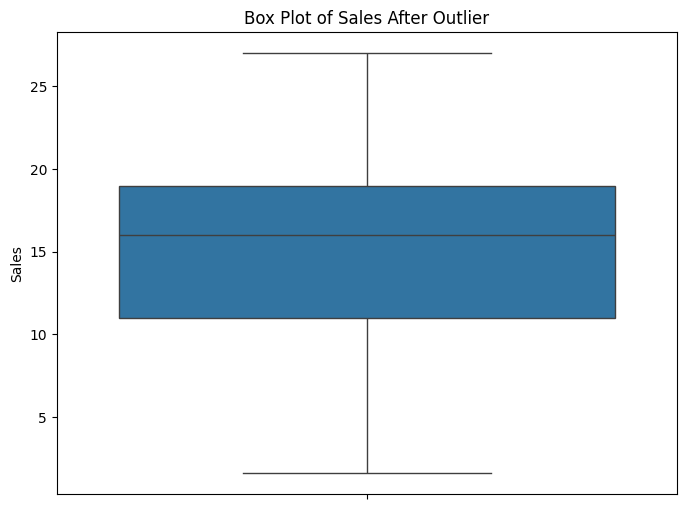

In [8]:
for column in data:

    print("Before Outlier Removing: ",column)

    boxplot('Before Outlier',column)

    print("After Outlier Removing: ",column)

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data = data.loc[(data[column] > lower_bound) & (data[column] < upper_bound)]

    boxplot('After Outlier',column)



In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scalerx = StandardScaler()
scalery = StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,precision_recall_curve, roc_curve, roc_auc_score,auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [12]:
X = data.drop(['Sales'], axis=1)
y = data['Sales']

In [13]:
X = scalerx.fit_transform(X)

In [14]:
y_array = y.values
y_reshaped = y_array.reshape(-1, 1)
y = scalery.fit_transform(y_reshaped)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
random_model = RandomForestRegressor()

random_model.fit(X_train, y_train)

y_random_pred = random_model.predict(X_test)

<ipython-input-16-bf93474fa3dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(X_train, y_train)


In [17]:
y_random_pred

array([-1.2390982 , -0.57019438,  1.53788919, -0.59396833, -1.76726024,
        1.54682819,  0.76304865, -0.52511898, -0.20521672,  0.73756298,
        0.36345613,  1.49604704, -1.84714071, -0.42450763, -0.60537983,
       -0.64703178, -1.82679021,  0.28852064, -1.05290063, -0.43763085,
       -0.24477657,  0.38932218,  1.89773167, -1.4698006 ,  0.57323745,
        1.33362342, -1.37584595,  0.40948249, -1.45059125,  0.22975144,
        0.59644082, -0.10669748, -0.53919315, -0.26113305,  0.45132464,
        0.98766492,  0.84616238,  0.23374546,  0.64189661,  0.54014411])

In [18]:
y_random_pred = y_random_pred.reshape(-1,1)

In [19]:
mse_rf = mean_squared_error(y_test, y_random_pred)

r2_rf = r2_score(y_test, y_random_pred)

print(f'Random Forest - MSE: {mse_rf}, R2: {r2_rf}')

Random Forest - MSE: 0.035079883461338925, R2: 0.9650743091644428


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [21]:
import numpy as np
inputs = np.array([237.4,5.1,23.5])

In [22]:
new_inputs = scalerx.transform(inputs.reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
new_pred = random_model.predict(new_inputs).reshape(-1,1)

In [24]:
n_pred = scalery.inverse_transform(new_pred)

In [25]:
print("Sales Prediction : ", n_pred[0][0] )

Sales Prediction :  17.42
